# Internship Studio

## Machine Learning Project

**Marketing Campaign for Banking Products**


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## The Data

The data is imported using Pandas, first and last five rows are checked.

In [32]:
Bank_Data = pd.DataFrame()
Bank_Data = pd.read_csv('Bank_Loan.csv')

Bank_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


From the above data we can see there are 14 columns. Let's understand what each column data represents.

|Sl. No|Column|Description|
|:-:|:-:|:-|
|1|ID|Customer ID|
|2|Age|Customer's age in completed years|
|3|Income|Annual income of the customer in (\$ X1000)|
|4|CCAvg Avg|spending on credit cards per month in (\$ X1000)|
|5|Mortgage|Value of house mortgage if any in (\$ X1000)|
|6|Personal Loan|Did this customer accept the personal loan offered in the last campaign?|
|7|Experience|Years of professional experience|
|8|ZIPCode|Home Address ZIP code|
|9|Family|Family size of the customer|
|10|Education|Education Level <br> 1. Undergrad <br> 2. Graduate <br> 3. Advanced/Professional|
|11|Securities Account|Does the customer have a securities account with the bank?|
|12|CD Account|Does the customer have a certificate of deposit (CD) account with the bank?|
|13|Online|Does the customer use internet banking facilities?|
|14|CreditCard|Does the customer uses a credit card issued by the Bank?|

From the above table,

|Sl. Nos|Variable Type|
|:-:|:-|
|1,8|Nominal Variables|
|2,3,4,5,7|Quantative Variables|
|9,10|Categorical Variables|
|6,11,12,13,14|Binary Variables|

## Exploratory Data Analysis

Let's check for missing values and do some basic Data Analysis

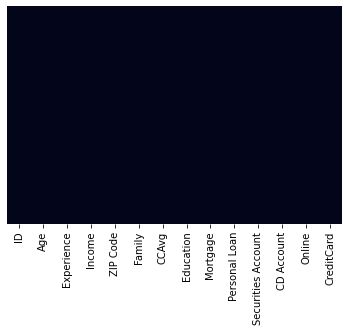

In [67]:
sns.heatmap(Bank_Data.isnull(),yticklabels=False,cbar=False)

From the above visualization we can understand that there are no NaN/Missing values

In [33]:
Bank_Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The describe function helps us to see various statistical parameters. All the values except Experience seems to be ok. The min of Experience is -3. Since, Experience is in 'Years' and time cannot be negative we have to fix it. 

In [94]:
Bank_Data[Bank_Data['Experience'] < 0]['Experience'].value_counts()

Series([], Name: Experience, dtype: int64)

In [95]:
Bank_Data[Bank_Data['Experience'] < 0]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [96]:
Exp_Age = [25,24,23,29,28,26]
Neg_Exp = Bank_Data[Bank_Data['Experience'] < 0].index.tolist()

In [97]:
for i in Neg_Exp:
    for x in Exp_Age:
        Bank_Data.loc[i,'Experience'] = Bank_Data[(Bank_Data.Age == x) & (Bank_Data.Experience > 0)].Experience.mean()

In [98]:
Bank_Data.Experience.describe()

count    5000.000000
mean       20.135738
std        11.413147
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [99]:
Bank_Data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [100]:
Bank_Data['Mortgage'].value_counts().head(1)

0    3462
Name: Mortgage, dtype: int64

In [101]:
Bank_Data['CCAvg'].value_counts().head()

0.3    241
1.0    231
0.2    204
2.0    188
0.8    187
Name: CCAvg, dtype: int64

## Machine Learning
### Train Test Split

Now we split our data into a training set and a testing set

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [162]:
X = Bank_Data.drop(['ID', 'Personal Loan', 'ZIP Code'],axis=1)
X = StandardScaler().fit_transform(X)
y = Bank_Data['Personal Loan']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training a Logistic Regression Model

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
predictions = logmodel.predict(X_test)

In [167]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1331
           1       0.87      0.61      0.72       169

    accuracy                           0.95      1500
   macro avg       0.91      0.80      0.84      1500
weighted avg       0.94      0.95      0.94      1500



## Training a Decision Tree Model

Let's start by training a single decision tree first

In [168]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
dtree = DecisionTreeClassifier()

In [170]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [171]:
predictions = dtree.predict(X_test)

In [172]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1331
           1       0.97      0.89      0.93       169

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [173]:
print(confusion_matrix(y_test,predictions))

[[1327    4]
 [  18  151]]


## Training the Random Forest model

In [174]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
rfc_pred = rfc.predict(X_test)

In [176]:
print(confusion_matrix(y_test,rfc_pred))

[[1331    0]
 [  20  149]]


In [177]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1331
           1       1.00      0.88      0.94       169

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



After making the model in Logistic Regression, Decision Trees & Random Forests, Random Forests has given the highest accuracy

---

# Data Analysis for Business Proposal

In [191]:
Bank_Data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [197]:
p = (480 / (4520+480)) * 100
p = str(p)
print('The percentage of people who took loans in the previous campaign: '+ p+'%')

The percentage of people who took loans in the previous campaign: 9.6%


In [189]:
Cat = ['CreditCard',
 'Online',
 'CD Account',
 'Securities Account',
 'Education',
 'Family']

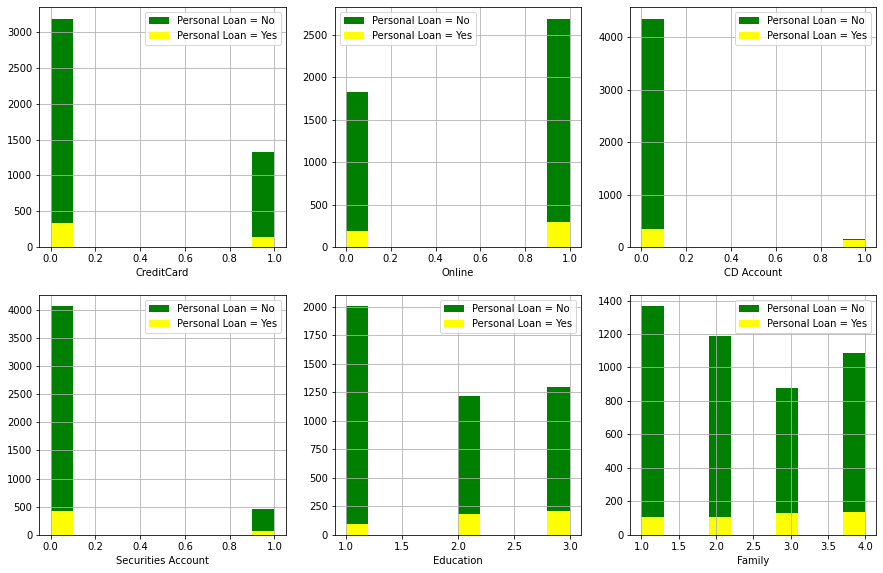

In [190]:
plt.figure(figsize=(15,15))
for i , column in enumerate(Cat,1):
    plt.subplot(3,3,i)
    Bank_Data[Bank_Data["Personal Loan"]==0][column].hist(color='Green',label='Personal Loan = No')
    Bank_Data[Bank_Data["Personal Loan"]==1][column].hist(color='Yellow',label="Personal Loan = Yes")
    plt.legend()
    plt.xlabel(column)

## Business Proposal

The lending business is the most profitable way to make money for a bank. There is a lot of money moving around from one bank to another every day. There are various types of loans:

- Corporate Loans
- Personal Loans
- Bonds etc.

All of them have one purpose to lend money to the borrower and get paid back with interest. This is the core principle of the Banking Industry. The banks also lend money to other banks in overnight loans. The entire world is in a delicate balance of lending and paying back. What if the borrower doesn't payback? The bank will consider it a loss. Now, what if a very large number of people don't payback? That causes a major problem. We have seen the 2008 financial crisis in the USA which caused a recession that affected the entire world. In India, we had the IL&FS crisis in 2018 which defaulted in payment of bank loans that caused a liquidity crisis in India. So, this shows us that lending loans to people and corporations are risky. It is important to have quality Credit Appraisal process to prevent bad actors from getting loans. This is where Machine Learning can help in accurately and efficiently predict creditworthy people from bad actors.

Now coming to the dataset, out of the 5000 people only 480 or 9.6% of the people took a loan in the previous campaign. From the above plot, we can understand who took a loan.

- Most people who have a Certificate Deposit account in the bank have taken a loan.
- People with a Securities Account tend not to take a loan.
- People without Credit Cards have more loan than people with Credit Card.
- People with higher education tend to take loans.

Overall the bank has to advertise more to get people take more loans. The bank can target people with Certificate of Deposit, highly educated and non-credit card holders.